In [6]:
# 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。
import pandas as pd

# 读取数据集
df = pd.read_csv("open_rank_20236.csv")

# 筛选美国排名前一百的项目
us_top_100 = df[df['rank'] <= 100]

# 计算value的最大值、最小值、均值和中位数
max_value = us_top_100['value'].max()
min_value = us_top_100['value'].min()
mean_value = us_top_100['value'].mean()
median_value = us_top_100['value'].median()

# 打印结果
print(f"美国排名前一百的项目中，value的最大值是：{max_value}")
print(f"美国排名前一百的项目中，value的最小值是：{min_value}")
print(f"美国排名前一百的项目中，value的均值是：{mean_value}")
print(f"美国排名前一百的项目中，value的中位数是：{median_value}")

美国排名前一百的项目中，value的最大值是：1394.45
美国排名前一百的项目中，value的最小值是：200.68
美国排名前一百的项目中，value的均值是：346.9679
美国排名前一百的项目中，value的中位数是：273.66999999999996


In [6]:
# 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。
import pandas as pd

# 读取CSV文件
data = pd.read_csv("activity_2022.csv")

# 存储每个仓库（repo）对应的平均增长率
average_growth_rates = {}

for index, row in data.iterrows():
    # 获取当前行对应的仓库名称
    repository_name = row['repo']
    # 获取当前行除了'repo'列之外的所有数值列数据
    value_columns = row.iloc[1:]

    # 存储每年的增长率
    growth_rates_list = []
    # 计算每年的增长率
    for i in range(1, len(value_columns)):
        # 计算相邻两年之间的增长率
        growth_rate = (value_columns.iloc[i] - value_columns.iloc[i - 1]) / value_columns.iloc[i - 1]
        growth_rates_list.append(growth_rate)

    # 计算平均增长率
    average_growth_rate = sum(growth_rates_list) / len(growth_rates_list)
    average_growth_rates[repository_name] = average_growth_rate

for repo_name, growth_rate_value in average_growth_rates.items():
    print(f'{repo_name} 的平均增长率为: {growth_rate_value:.2%}')
    


MicrosoftDocs/azure-docs 的平均增长率为: -1.79%
NixOS/nixpkgs 的平均增长率为: 0.03%
dotnet/runtime 的平均增长率为: -2.28%
elastic/kibana 的平均增长率为: -0.37%
firstcontributions/first-contributions 的平均增长率为: 14.08%
flutter/flutter 的平均增长率为: -1.24%
home-assistant/core 的平均增长率为: 0.85%
microsoft/vscode 的平均增长率为: 2.29%
pytorch/pytorch 的平均增长率为: 1.32%
rust-lang/rust 的平均增长率为: -0.38%


In [7]:
# data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。
import pandas as pd

# 加载中国企业的数据
china_data = pd.read_csv("china_2022.csv")
# 加载全球企业的数据
global_data = pd.read_csv("global_2022.csv")

# 删除第一列
china_data = china_data.drop(columns=['name'])
global_data = global_data.drop(columns=['name'])

# 计算中国开源企业各数值列的均值
china_mean = china_data.mean()
# 计算全球开源企业各数值列的均值
global_mean = global_data.mean()

print("\n中国开源企业的均值：")
for col, mean_value in china_mean.items():
    print(f"{col}: {mean_value:.2f}")

print("\n全球开源企业的均值：")
for col, mean_value in global_mean.items():
    print(f"{col}: {mean_value:.2f}")

# 计算均值差异
mean_diff = china_mean - global_mean

print("\n均值差异：")
for col, diff_value in mean_diff.items():
    print(f"{col}: {diff_value:.2f}")


中国开源企业的均值：
issue_comment: 61205.50
open_issue: 9169.20
open_pull: 16912.70
review_comment: 19857.50
merged_pull: 13764.10
rank: 5.50
value: 40269.53
rankDelta: 5.30
valueDelta: 9265.01

全球开源企业的均值：
issue_comment: 341409.40
open_issue: 43300.20
open_pull: 83423.00
review_comment: 120392.10
merged_pull: 62472.00
rank: 5.50
value: 215855.49
rankDelta: 0.10
valueDelta: 11906.92

均值差异：
issue_comment: -280203.90
open_issue: -34131.00
open_pull: -66510.30
review_comment: -100534.60
merged_pull: -48707.90
rank: 0.00
value: -175585.96
rankDelta: 5.20
valueDelta: -2641.91


In [ ]:
# 根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。
# 非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）
# 工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）
# 已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

# 定义事件A为“项目是非软件型项目”
# 非软件类项目占总项目的比例
P_A = 0.25
# 软件类项目占总项目的比例
P_not_A = 0.75
# 定义事件B为“项目带有HTML/Markdown标签”
# 非软件类项目中带有 HTML/Markdown 标签的概率
P_B_given_A = 0.85
# 软件类项目中带有 HTML/Markdown 标签的概率
P_B_given_not_A = 0.10

# 计算P(B)
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A

# 计算P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"已知一个项目带有HTML/Markdown标签，该项目是非软件型项目的概率是：{P_A_given_B:.4f}")

已知一个项目带有HTML/Markdown标签，该项目是非软件型项目的概率是：0.7391


In [4]:
# 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

# 定义事件C为“项目是工具组件型项目”
# 工具组件型项目占总项目的比例
P_C = 0.5
# 非工具组件型项目占总项目的比例
P_not_C = 0.5
# 定义事件D为“项目由JavaScript语言编写”
# 工具组件型项目中由JavaScript语言编写的概率
P_D_given_C = 0.35
# 非工具组件型项目中由JavaScript语言编写的概率
P_D_given_not_C = 0.10

# 计算P(D)
P_D = P_D_given_C * P_C + P_D_given_not_C * P_not_C

# 计算P(C|D)
P_C_given_D = (P_D_given_C * P_C) / P_D

print(f"已知一个项目是由JavaScript语言编写的，该项目是工具组件型项目的概率是：{P_C_given_D:.4f}")

已知一个项目是由JavaScript语言编写的，该项目是工具组件型项目的概率是：0.7778


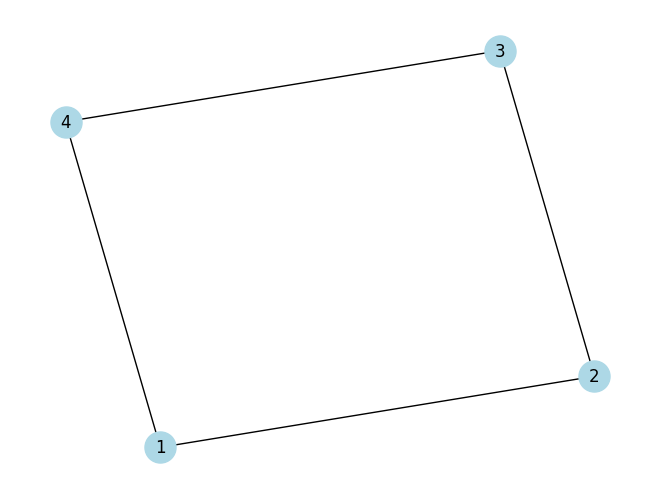

In [7]:
# 根据以下数据建立可视化无向图
# user = [1, 2, 3, 4]
# edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点
user = [1, 2, 3, 4]
G.add_nodes_from(user)

# 添加边
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_edges_from(edge)

# 绘制图形
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=12)
plt.show()

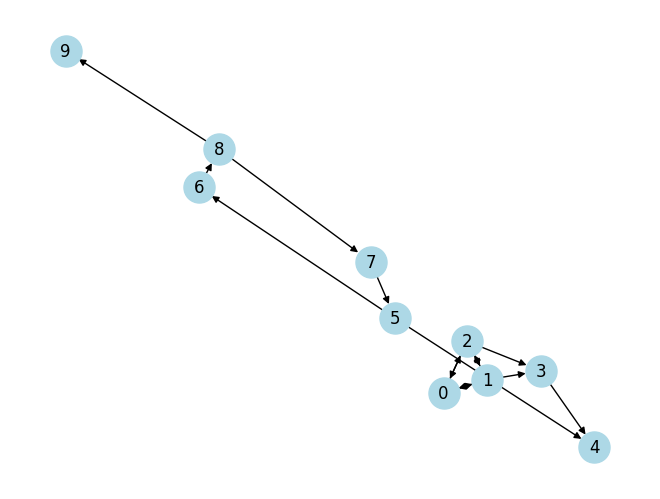

In [8]:
# 根据以下数据建立可视化有向图
# users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个有向图
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)

# 绘制图形
pos = nx.spring_layout(G)  # 使用 spring 布局算法确定节点位置
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, arrows=True)
plt.show()

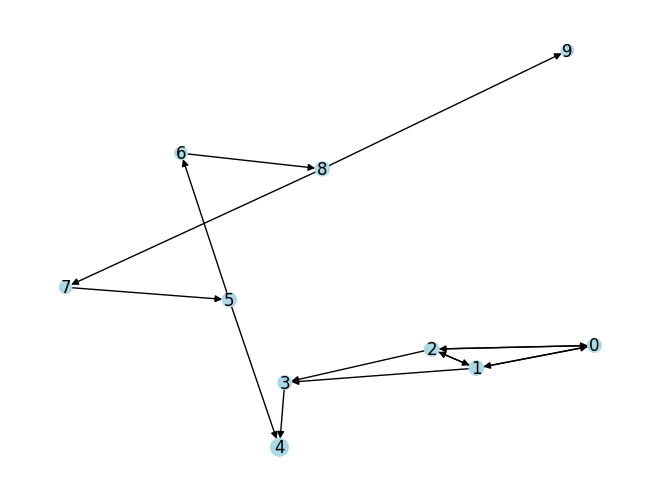

节点 0 的PageRank值: 0.09499069584253748
节点 1 的PageRank值: 0.10547659652084884
节点 2 的PageRank值: 0.10547659652084884
节点 3 的PageRank值: 0.09499069584253748
节点 4 的PageRank值: 0.15931683334639937
节点 5 的PageRank值: 0.1020112395832942
节点 6 的PageRank值: 0.0785753675867465
节点 7 的PageRank值: 0.0785753675867465
节点 8 的PageRank值: 0.1020112395832942
节点 9 的PageRank值: 0.0785753675867465


In [9]:
# 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个有向图
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)

# 计算PageRank值
pr = nx.pagerank(G)

# 绘制图形，根据PageRank值调整节点大小
pos = nx.spring_layout(G)
node_sizes = [v * 1000 for v in pr.values()]  # 根据PageRank值调整节点大小，这里乘以1000是为了使大小差异更明显，可根据实际情况调整
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, font_size=12, arrows=True)
plt.show()

# 输出每个节点的PageRank值
for node, rank in pr.items():
    print(f"节点 {node} 的PageRank值: {rank}")